<a href="https://colab.research.google.com/github/KrisMatrix/Data_Visualization/blob/main/Data_Visualization_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Tutorial/Cheat Sheet

Python's *matplotlib* has amazing data visualization and charting capabilities. However, when I want to draw a chart, I always find it a struggle to plot what I want. This is created for my reference. I compiled codes from various souces including the matplotlib tutorials. I have added some additional notes or comments that was helpful for me to do my own plots.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#!wget https://matplotlib.org/stable/_images/anatomy.png

# Part of a Figure

<img src="https://matplotlib.org/stable/_images/anatomy.png" />

**Figure:** Think of it as the canvas. This is where you can have one or more plots.

**Axes:** The Axes is the plot. The plot contains the labels, titles, axis labels, the data points, curves, etc.

**Axis:** This the number lines. For example, the x and y coordinates are called axis.

**Subplot**: A figure can have multiple sub-plots.

**Artists:** For some reason they call artists everything that is on the figure.

The definition I provided are a contextual or illustrative definition. These names also have a python object meaning. 

All of plotting functions expect *numpy.array* or *numpy.ma.masked_array* as input. Classes that are 'array-like' such as pandas data objects and numpy.matrix may or may not work as intended. It is best to convert these to numpy.array objects prior to plotting.

In [4]:
#For example, to convert a pandas.DataFrame
a = pd.DataFrame(np.random.rand(4, 5), columns = list('abcde'))
a_asarray = a.values

In [5]:
#To convert a numpy.matrix
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

## The OO-Style

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


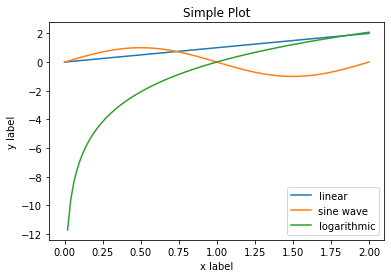

In [13]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, np.sin(x*np.pi), label='sine wave')  # Plot more data on the axes...
ax.plot(x, np.log(x**3), label='logarithmic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

* plt.subplot(nrows, ncols, index, **kwargs)
* plt.plot(x,y, label="label_name") where y = f(x). Essentially, we are providing the x-values and the y-values for the plot.



## Pyplot style

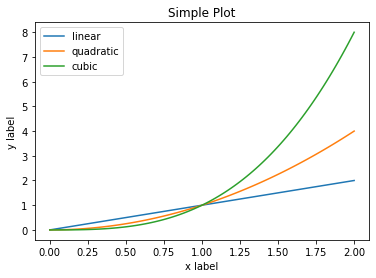

In [6]:
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

# Sample plots in Matplotlib

## 1. Line Plot

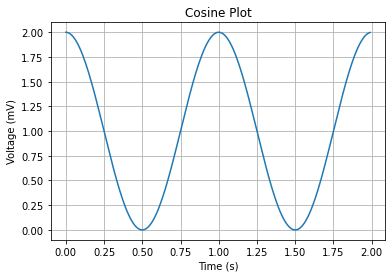

In [14]:
#Let's draw a line plot of a Cosine curve
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.cos(2 * np.pi * t) #1 + 2 * cos(2*pi*t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='Time (s)', ylabel='Voltage (mV)', title='Cosine Plot')
ax.grid()

fig.savefig("cosine_line_plot.png")
plt.show()

## 2. Multiple subplots

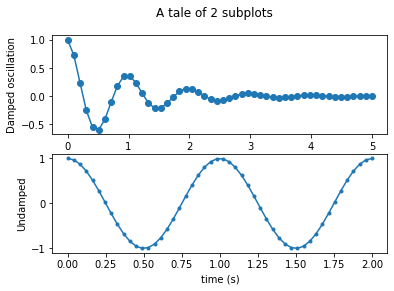

In [8]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('A tale of 2 subplots')

#The o- and .- are the format string. Refer to https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot
# for the types of format strings. You can set color, line style and markers.
ax1.plot(x1, y1, 'o-')
ax1.set_ylabel('Damped oscillation')

ax2.plot(x2, y2, '.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')

plt.show()

Alternative Method:

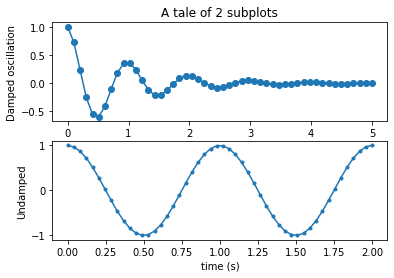

In [9]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## 3. Histogram

A dataset has a distribution. A dataset can have a mean $\mu$ and standard deviation $\sigma$. 

\begin{equation}
y = \mu + \sigma * x
\end{equation}

This is the equation for a **normal distribution**.

We will also draw a best fit line.

\begin{equation}
z = \frac{1}{\sqrt{2*\pi}*\sigma} * e^{-0.5 * {\frac{1}{\sigma} * (bins - \mu)}^2}
\end{equation}


> *ax.hist(x, bins,range,density, weights)*

> **x:** array

> **bins:** If bins is an integer, it defines the number of equal-width bins in the range. If bins is a sequence, it defines the bin edges, including the left edge of the first bin and the right edge of the last bin.

> **density:** if True, draw and return a probability density.

> **Returns**

> **n:** array of the values of the histogram bins

> **bins:** the edges of the bins

> **patches:** contains the information to create the histogram.

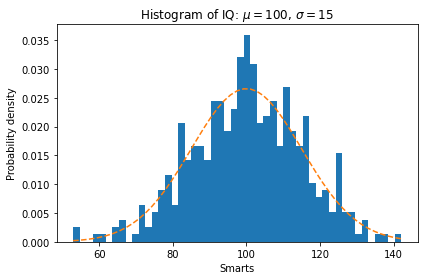

In [10]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data

n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
z = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, z, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## 4. Bar Chart

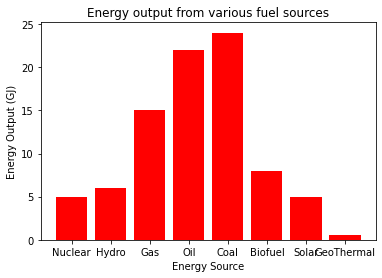

In [15]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel', 'Solar', 'GeoThermal']
energy = [5, 6, 15, 22, 24, 8, 5, 0.5]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='Red')
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

plt.show()

## 5. Error Bars

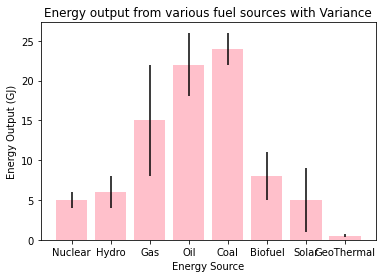

In [17]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel', 'Solar', 'GeoThermal']
energy = [5, 6, 15, 22, 24, 8, 5, 0.5]
variance = [1, 2, 7, 4, 2, 3, 4, 0.2]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='pink', yerr=variance)
plt.xlabel("Energy Source")
plt.ylabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources with Variance")

plt.xticks(x_pos, x)

plt.show()

## 6. Horizontal Bar Chart

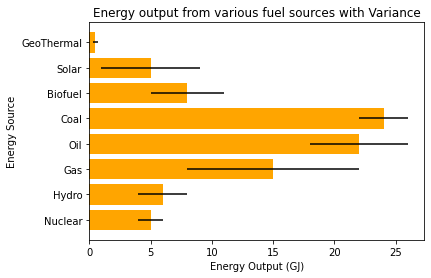

In [22]:
x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel', 'Solar', 'GeoThermal']
energy = [5, 6, 15, 22, 24, 8, 5, 0.5]
variance = [1, 2, 7, 4, 2, 3, 4, 0.2]

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, energy, color='orange', xerr=variance)   #OBSERVE xerr and barh
plt.ylabel("Energy Source")         
plt.xlabel("Energy Output (GJ)")
plt.title("Energy output from various fuel sources with Variance")

plt.yticks(x_pos, x)  #OBSERVE yticks

plt.show()

## 7. Bar Chart with Multiple X’s

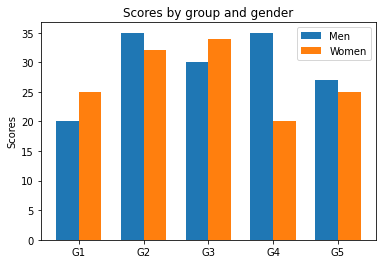

In [15]:
N = 5
men_means = (20, 35, 30, 35, 27)
women_means = (25, 32, 34, 20, 25)

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, men_means, width, label='Men')
plt.bar(ind + width, women_means, width,
    label='Women')

plt.ylabel('Scores')
plt.title('Scores by group and gender')

plt.xticks(ind + width / 2, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.legend(loc='best')
plt.show()

## 8. Stacked Bar Charts

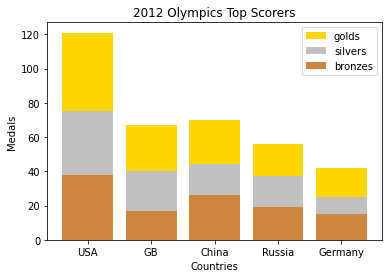

In [16]:
countries = ['USA', 'GB', 'China', 'Russia', 'Germany']
bronzes = np.array([38, 17, 26, 19, 15])
silvers = np.array([37, 23, 18, 18, 10])
golds = np.array([46, 27, 26, 19, 17])
ind = [x for x, _ in enumerate(countries)]

plt.bar(ind, golds, width=0.8, label='golds', color='gold', bottom=silvers+bronzes)
plt.bar(ind, silvers, width=0.8, label='silvers', color='silver', bottom=bronzes)
plt.bar(ind, bronzes, width=0.8, label='bronzes', color='#CD853F')

plt.xticks(ind, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.legend(loc="upper right")
plt.title("2012 Olympics Top Scorers")

plt.show()

If we wanted to view the same bar charts but as a proportion of the total medals won by that country, we can do the following:

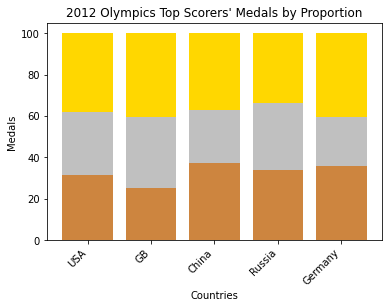

In [17]:
total = bronzes + silvers + golds
proportion_bronzes = np.true_divide(bronzes, total) * 100
proportion_silvers = np.true_divide(silvers, total) * 100
proportion_golds = np.true_divide(golds, total) * 100

plt.bar(ind, proportion_golds, width=0.8, label='golds', color='gold', bottom=proportion_bronzes+proportion_silvers)
plt.bar(ind, proportion_silvers, width=0.8, label='silvers', color='silver', bottom=proportion_bronzes)
plt.bar(ind, proportion_bronzes, width=0.8, label='bronzes', color='#CD853F')

plt.xticks(ind, countries)
plt.ylabel("Medals")
plt.xlabel("Countries")
plt.title("2012 Olympics Top Scorers' Medals by Proportion")
plt.ylim=1.0

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

## 9. Pie Chart

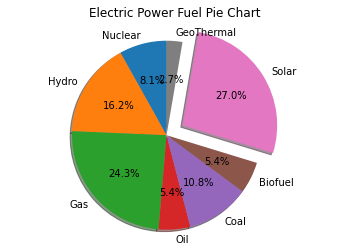

In [23]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel', 'Solar', 'GeoThermal'
#labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10, 20, 10, 50, 5]
explode = (0, 0, 0, 0, 0, 0, 0.2, 0)  # only "explode" the 2nd slice (i.e. 'Solar')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Electric Power Fuel Pie Chart")

plt.show()

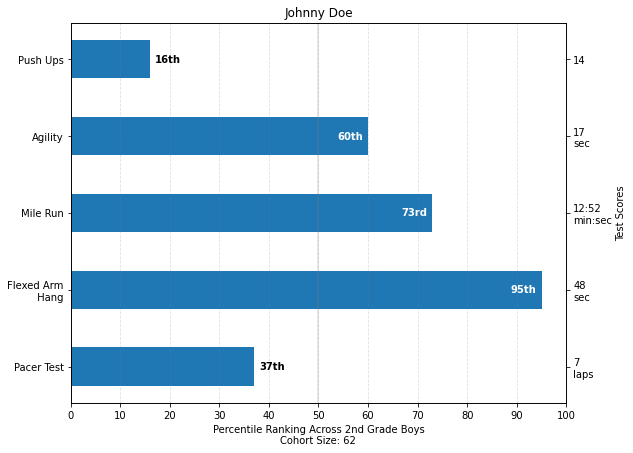

In [12]:
from matplotlib.ticker import MaxNLocator #Finds up to a max number of intervals with ticks at nice locations.
from collections import namedtuple  #factory function for creating tuple subclasses with named fields

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_units = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}
    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(score, test):
    """
    Create score labels for the right y-axis as the test name followed by the
    measurement unit (if any), split over two lines.
    """
    unit = test_units[test]
    if unit:
        return f'{score}\n{unit}'
    else:  # If no unit, don't include a newline, so that label stays centered.
        return score


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]


def plot_student_results(student, scores, cohort_size):
    fig, ax1 = plt.subplots(figsize=(9, 7))  # Create the figure
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.manager.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names))

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    # Set the tick locations
    ax2.set_yticks(pos)
    # Set equal limits on both yaxis so that the ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # Set the tick labels
    ax2.set_yticklabels([format_score(scores[k].score, k) for k in test_names])

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rank_str = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(
            rank_str, xy=(width, yloc), xytext=(xloc, 0),
            textcoords="offset points",
            horizontalalignment=align, verticalalignment='center',
            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # Make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # Return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(
    test_names,
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()